In [2]:
import pandas as pd

In [4]:
df = pd.read_csv("adult.csv")

In [6]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [8]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
target            object
dtype: object

<Axes: >

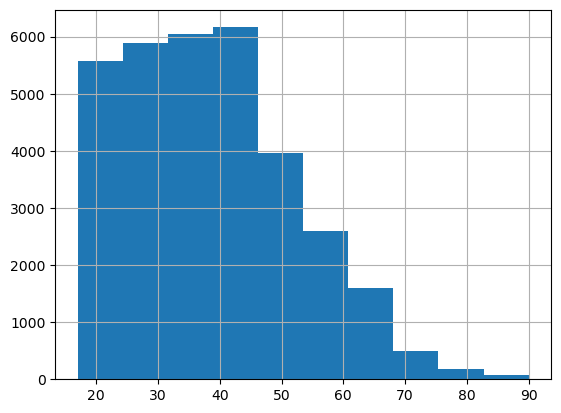

In [10]:
df["age"].hist()

<Axes: xlabel='target'>

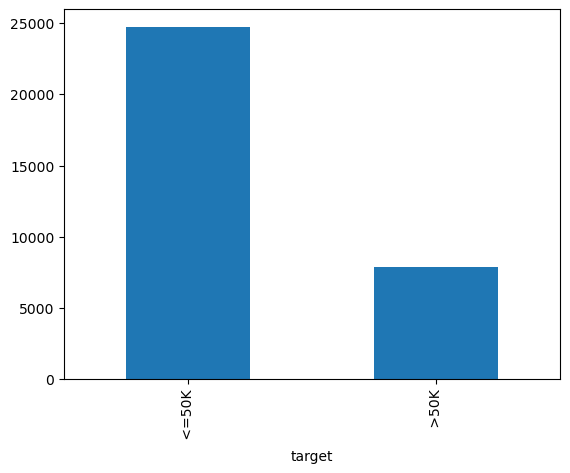

In [14]:
df['target'].value_counts().plot(kind='bar')

<Axes: xlabel='workclass'>

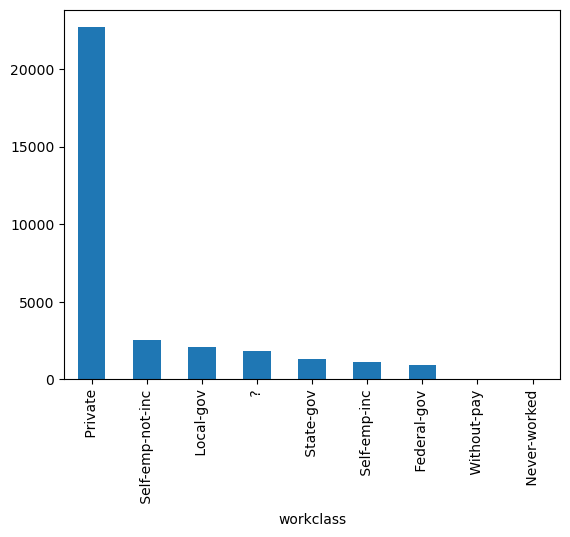

In [16]:
df['workclass'].value_counts().plot(kind='bar')

In [64]:
df['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [68]:
df['target'].count()

32561

Removing Missing Value

In [83]:
df = df.replace('?', pd.NaT)
df = df.dropna()

In [81]:
df['target'].count()

32561

Splitting Feature

In [88]:
x = df.drop(['target'], axis=1)
y = df['target']

In [90]:
print(x.shape)

(32561, 14)


In [92]:
print(y.shape)

(32561,)


Splitting training and testing data

In [98]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [100]:
le = LabelEncoder()
y = le.fit_transform(y)

In [102]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=1)

In [104]:
print(x_train)

       age          workclass  fnlwgt      education  education-num  \
16465   39   Self-emp-not-inc  188571           11th              7   
5625    54   Self-emp-not-inc  105010      Bachelors             13   
30273   32            Private  156464        HS-grad              9   
3136    45   Self-emp-not-inc   32172   Some-college             10   
4521    60            Private  146674           10th              6   
...    ...                ...     ...            ...            ...   
32511   25          Local-gov  514716      Bachelors             13   
5192    32            Private  207668      Bachelors             13   
12172   27            Private  104457      Bachelors             13   
235     59          State-gov  268700        HS-grad              9   
29733   33            Private   59083      Bachelors             13   

            marital-status          occupation    relationship  \
16465   Married-civ-spouse    Transport-moving         Husband   
5625    Married

In [106]:
print(x_test)

       age          workclass  fnlwgt   education  education-num  \
9646    62   Self-emp-not-inc   26911     7th-8th              4   
709     18            Private  208103        11th              7   
7385    25            Private  102476   Bachelors             13   
16671   33            Private  511517     HS-grad              9   
21932   36            Private  292570        11th              7   
...    ...                ...     ...         ...            ...   
5889    39            Private  146091   Bachelors             13   
25723   17            Private  347322        10th              6   
29514   35            Private  290226     HS-grad              9   
1600    30            Private   27207        11th              7   
639     52   Self-emp-not-inc  289436   Doctorate             16   

            marital-status          occupation     relationship    race  \
9646               Widowed       Other-service    Not-in-family   White   
709          Never-married       

In [108]:
print(y_train)

[0 1 1 ... 0 0 1]


In [110]:
print(y_test)

[0 0 1 ... 0 0 1]


In [114]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(26048, 14)
(6513, 14)
(26048,)
(6513,)


In [116]:
x_train.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
16465,39,Self-emp-not-inc,188571,11th,7,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States
5625,54,Self-emp-not-inc,105010,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States
30273,32,Private,156464,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,1902,50,United-States
3136,45,Self-emp-not-inc,32172,Some-college,10,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,50,United-States
4521,60,Private,146674,10th,6,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States


In [118]:
x_test.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
9646,62,Self-emp-not-inc,26911,7th-8th,4,Widowed,Other-service,Not-in-family,White,Female,0,0,66,United-States
709,18,Private,208103,11th,7,Never-married,Other-service,Other-relative,White,Male,0,0,25,United-States
7385,25,Private,102476,Bachelors,13,Never-married,Farming-fishing,Own-child,White,Male,27828,0,50,United-States
16671,33,Private,511517,HS-grad,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States
21932,36,Private,292570,11th,7,Never-married,Machine-op-inspct,Unmarried,White,Female,0,0,40,United-States


OneHotEncoder

In [138]:
from sklearn.compose import ColumnTransformer
import sklearn.model_selection
from sklearn.preprocessing import OneHotEncoder, StandardScaler

numerical_attributes = x_train.select_dtypes(include=["int64", "float64"]).columns
categorical_attributes = x_train.select_dtypes(include="object").columns

ct = sklearn.compose.ColumnTransformer([
    ("standard_scaler", sklearn.preprocessing.StandardScaler(), numerical_attributes),
    ("one_hot_encoder", sklearn.preprocessing.OneHotEncoder(handle_unknown="ignore"), categorical_attributes)
])



In [140]:
ct = ct.fit(x_train)

x_train = ct.transform(x_train)
x_test = ct.transform(x_test)

print("x_train:", x_train.shape)
print("x_test:", x_test.shape)

x_train: (26048, 107)
x_test: (6513, 107)


Dimentionality Reduction

In [143]:
pca = sklearn.decomposition.PCA(n_components=100)
pca.fit(x_train.toarray())

x_train = pca.transform(x_train.toarray())
x_test = pca.transform(x_test.toarray())

print("x_train:", x_train.shape)
print("x_test:", x_test.shape)

x_train: (26048, 100)
x_test: (6513, 100)


In [145]:
x_train, x_test

(array([[-3.35353553e-02, -1.19612017e+00, -3.26005184e-01, ...,
         -2.48412402e-15,  1.22124533e-15,  6.66133815e-16],
        [ 1.70002588e+00, -2.57262025e-01,  2.68506945e-01, ...,
         -1.15185639e-15,  4.99600361e-16, -1.55431223e-15],
        [ 1.31595642e+00, -1.32846453e-01,  3.14006757e+00, ...,
         -1.26287869e-15,  1.99840144e-15,  6.21724894e-15],
        ...,
        [-1.86447012e-01,  1.39069913e+00,  4.93791089e-01, ...,
          1.26287869e-15, -5.82867088e-16,  5.30686606e-14],
        [ 7.61497735e-01, -1.46499170e+00, -5.85989551e-01, ...,
         -9.29811783e-16,  1.66533454e-16, -1.55431223e-15],
        [ 1.99951915e+00,  8.69802051e-01,  3.76848571e+00, ...,
         -7.07767178e-16,  1.60982339e-15,  6.88338275e-15]]),
 array([[ 6.50941269e-01, -2.48457438e+00,  2.08963928e-03, ...,
         -2.09554596e-15, -1.05471187e-15,  1.77635684e-15],
        [-2.21758457e+00,  6.39179636e-02, -1.27354162e-01, ...,
          5.13478149e-16,  3.88578059e

Linear Regression

In [151]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [156]:
#Create Model
linear_model = LinearRegression()
logistic_model = LogisticRegression()

In [231]:
# Train models
linear_model.fit(x_train, y_train)


LinearRegression()

In [233]:
logistic_model.fit(x_train, y_train)

LogisticRegression()

In [235]:
# Make predictions
y_linear = linear_model.predict(x_test)
y_logistic = logistic_model.predict(x_test)


In [243]:
# Linear Regression evaluation
ma = mean_absolute_error(y_test, y_linear)
ms = mean_squared_error(y_test, y_linear)
r2 = r2_score(y_test, y_linear)
linear_score = linear_model.score(x_test, y_test)

print(f"Linear Regression Score: {linear_score}")
print(f"MAE: {ma}")
print(f"MSE: {ms}")
print(f"R²: {r2}")

Linear Regression Score: -6.374500556511263e+17
MAE: 4152582.012048731
MSE: 1.1230974981659133e+17
R²: -6.374500556511263e+17


In [176]:
# Logistic Regression evaluation
accuracy = accuracy_score(y_test, y_logistic)
conf_matrix = confusion_matrix(y_test, y_logistic)
report = classification_report(y_test, y_logistic)
logistic_score = logistic_model.score(x_test, y_test)

print(f"\nLogistic Regression Score: {logistic_score}")
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{report}")



Logistic Regression Score: 0.8524489482573315
Accuracy: 0.8524489482573315
Confusion Matrix:
[[4629  397]
 [ 564  923]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.92      0.91      5026
           1       0.70      0.62      0.66      1487

    accuracy                           0.85      6513
   macro avg       0.80      0.77      0.78      6513
weighted avg       0.85      0.85      0.85      6513



Naive Bayes

In [181]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [191]:
# Create and train the model
model = GaussianNB()
model.fit(x_train, y_train)


GaussianNB()

In [193]:
# Predict on test data
y_pred = model.predict(x_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.4217718409335176
Confusion Matrix:
 [[1376 3650]
 [ 116 1371]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.27      0.42      5026
           1       0.27      0.92      0.42      1487

    accuracy                           0.42      6513
   macro avg       0.60      0.60      0.42      6513
weighted avg       0.77      0.42      0.42      6513



SVM

In [202]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [204]:
# Create and train the SVM model
model = SVC()
model.fit(x_train, y_train)


SVC()

In [205]:
# Predict on test data
y_pred = model.predict(x_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8581298940580377
Confusion Matrix:
 [[4687  339]
 [ 585  902]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.93      0.91      5026
           1       0.73      0.61      0.66      1487

    accuracy                           0.86      6513
   macro avg       0.81      0.77      0.79      6513
weighted avg       0.85      0.86      0.85      6513



Decision Tree

In [211]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [213]:
# Create and train the Decision Tree model
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [215]:
# Predict on test data
y_pred = model.predict(x_test)

In [217]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7850452940273299
Confusion Matrix:
 [[4261  765]
 [ 635  852]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.85      0.86      5026
           1       0.53      0.57      0.55      1487

    accuracy                           0.79      6513
   macro avg       0.70      0.71      0.70      6513
weighted avg       0.79      0.79      0.79      6513



KNN

In [220]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [222]:
# Create and train the KNN model
model = KNeighborsClassifier(n_neighbors=5)  # You can change the number of neighbors
model.fit(x_train, y_train)

KNeighborsClassifier()

In [224]:
# Predict on test data
y_pred = model.predict(x_test)

In [226]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8352525717795178
Confusion Matrix:
 [[4506  520]
 [ 553  934]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.90      0.89      5026
           1       0.64      0.63      0.64      1487

    accuracy                           0.84      6513
   macro avg       0.77      0.76      0.76      6513
weighted avg       0.83      0.84      0.83      6513



Comparison of performance between different models

In [229]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Define all models
models = {
    "Linear Regression": LinearRegression(),
    "Logistic Regression": LogisticRegression(),
    "GaussianNB": GaussianNB(),
    "SVC": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier(n_neighbors=5)
}

# Dictionary to store results
results = {}

# Train, predict, and evaluate each model
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    # For Linear Regression, round predictions since it's for regression tasks
    if name == "Linear Regression":
        y_pred = y_pred.round()

    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy

# Print the comparison results
print("Model Performance Comparison:")
for name, accuracy in results.items():
    print(f"{name}: {accuracy:.4f}")


Model Performance Comparison:
Linear Regression: 0.8386
Logistic Regression: 0.8524
GaussianNB: 0.4218
SVC: 0.8581
Decision Tree: 0.7872
KNN: 0.8353


Bar Chart

In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Logistic Regression": LogisticRegression(),
    "GaussianNB": GaussianNB(),
    "SVC": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier(n_neighbors=5)
}

# Store results
results = {}

# Train, predict, and evaluate
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    if name == "Linear Regression":
        y_pred = y_pred.round()  # For classification comparison

    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy

# Print the results
print("Model Performance Comparison:")
for name, accuracy in results.items():
    print(f"{name}: {accuracy:.4f}")

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(results.keys(), results.values(), color='skyblue')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1)  # Accuracy ranges from 0 to 1
plt.xticks(rotation=30)
plt.show()
